In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
import decimal
data=loadmat(r'C:\Users\saminens\Desktop\ML\ex8data1')

In [2]:
X=data['X']
Xval=data['Xval']
yval=data['yval']
X.shape

(307, 2)

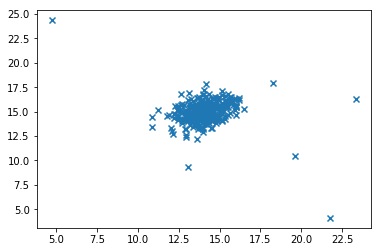

In [3]:
pt.scatter(X[:,0],X[:,1],marker='x')

In [4]:
def estimateGaussian(X):
    m,n=X.shape
    mu= np.mean(X,axis=0)
    sigma2= np.var(X,axis=0)
    return mu,sigma2

In [5]:
estimateGaussian(X)

(array([ 14.11222578,  14.99771051]), array([ 1.83263141,  1.70974533]))

In [6]:
def multivariateGaussian(X,mu,sigma2):
    k=len(mu)
    if len(sigma2.shape)==1:
        sigma2=np.diag(sigma2)
    X_mu=X-mu
    p=(2*np.pi)**(-k/2)*np.linalg.det(sigma2)**(-0.5)*np.exp(-0.5*np.sum(X_mu.dot(np.linalg.pinv(sigma2))*X_mu, axis=1))
    return p

In [7]:
def visualize(X,mu,sigma2):   #In NumPy, the logic used to choose the output dtype of an operation 
    t=np.arange(0,35.5,0.5)   #like a_range ** s is based on dtypes, not values. That means that 
    X1,X2=np.meshgrid(t,t)    #a_range ** -2 has to have the same output dtype as a_range ** 2  --- source:Stackoverflow
    Z = np.hstack((X1.reshape((-1,1)), X2.reshape((-1,1))))
    Z = multivariateGaussian(Z, mu, sigma2).reshape(np.shape(X1))
    pt.plot(X[:, 0], X[:, 1], 'bx')
    mylevels = np.array([10**i for i in np.arange(-20,0,3).astype(float)]) 
    if np.sum(np.isinf(Z)) == 0:                                           
        pt.contour(X1,X2,Z,mylevels)                                       

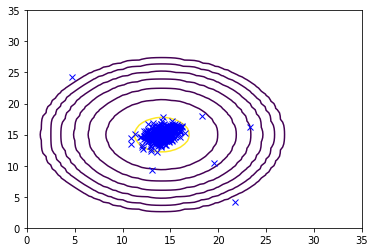

In [8]:
mu,sigma2=estimateGaussian(X)
visualize(X, mu, sigma2)
pt.figure()

In [9]:
def selectthreshold(yval,pval):
    bestEpsilon=0
    bestF1=0
    F1=0
    stepsize = (np.max(pval)-np.min(pval))/1000
    for epsilon in np.arange(np.min(pval),np.max(pval),stepsize):
        predictions=(pval<epsilon).reshape(-1,1)
        X=np.hstack((predictions,yval))
        tp=np.sum((X[:,0]==1) & (X[:,1]==1))
        fp=np.sum((X[:,0]==1) & (X[:,1]==0))
        fn=np.sum((X[:,0]==0) & (X[:,1]==1))
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        F1=(2*precision*recall)/(precision+recall)
        if F1>bestF1:
            bestF1=F1
            bestEpsilon=epsilon
    return bestEpsilon,bestF1

In [10]:
pval=multivariateGaussian(X,mu,sigma2)
epsilon,F1=selectthreshold(yval,pval)
epsilon,F1

C:\Users\saminens\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


(8.9860950834153637e-05, 0.80000000000000004)

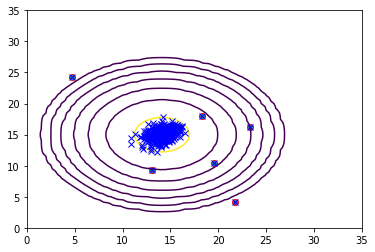

In [11]:
outliers=np.where(pval<epsilon)
visualize(X, mu, sigma2)
pt.scatter(X[outliers,0],X[outliers,1],facecolors=None,edgecolors='r')
pt.show()

In [12]:
#multidimensional outliers
data1=loadmat(r'C:\Users\saminens\Desktop\ML\ex8data2')
X1=data1['X']
Xval1=data1['Xval']
yval1=data1['yval']
X1.shape

(1000, 11)

In [13]:
mu1,sigma21=estimateGaussian(X1)
p1=multivariateGaussian(X1,mu1,sigma21)
pval1=multivariateGaussian(Xval1,mu1,sigma21)
epsilon1,F11=selectthreshold(yval1,pval1)
epsilon1,F11

C:\Users\saminens\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


(1.3772288907613579e-18, 0.61538461538461542)

In [14]:
#number of outliers found
np.sum(p1<epsilon1)

117